In [1]:
!pip install emoji
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.7 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd

# 일반적 
# 0. 일반발언 common 
# 1. 성차별 sex
# 2. 인종차별 
# 3. 종교차별 religion
# 4. 연령차별 age
# 5. 정치차별 political
# 6. 혐오욕설 
# 7. 출신차별
# 8. 외모차별
# 9. 성소수자 차별
# 10. 기타혐오 other 
df = pd.read_excel('/kaggle/input/korean-hate-speech-sum/filtered_data.xlsx')
print(len(df))
df.head(10)

153719


,text,class
0,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,0
1,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",0
2,10+8 진짜 이승기랑 비교된다,0
3,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,0
4,10살 차이가 넘을텐데 부부라고? 무슨 내용인지 긍금하네..,0
5,12월이나 1월이더 결혼성수기지 5월은 여름이라 비수기에속한다,0
6,13살 차이면 요즘 세상에 놀랄일도 아니네요,0
7,15년생인 울아들은 유모차 안타는데,0
8,166에 57.4 다이어트 필요없지만건강위해더뺄거야다들 더마르게봄,0
9,17년도 아니고 27년이면 진짜 너무했다 이것이 사랑만으로 가능할수 있는지 도저히 ...,0


In [3]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

def text_preprocess(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
 
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='') #emoji 삭제
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    
    return text

df['text'] = df['text'].apply(lambda x: text_preprocess(x))
df.sample(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,text,class
87787,"""매춘녀도 똑같이 처벌하라""",0
63980,"""전라도는??????상식적으로 얘기했음 좋겠다""",0
124432,Kbs 방송 수신료 안내고 싶다,0
98269,이용진 여자들이 좋아하는 스타일 막 노는 스탈도 아닌것같고 인성도 바를거같은,0
116671,지저분한 ㅅ.ㄲ가 어디서 몰 논해??,6
21199,결혼생활 3년만 넘어도 사랑보단 의리로 살죠. 좋은 사람으로 남게 서로 지켜줘야해요...,0
102447,쩝쩝이가 또 무슨 일을 덮으려고 없던 일을 만들어내는건지,5
125617,여자도 군대가는 나라들은 그럼 그 나라 여자들은 애도 안 낳고 생리통도 없어서 군대...,1
98799,"""바퀴벌레 많도 못한 문죄인 끌어내리지 않고 모하냐 .""",5
59161,시즌은 무슨 시즌이야 그만해라 노잼프로,0


In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "beomi/KcELECTRA-small-v2022"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=11, output_hidden_states=True)

# set device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-small-v2022 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [5]:
batch_size =  32
learning_rate =  5e-5
num_epochs = 10
num_training_steps = 5000

In [6]:
from torch.utils.data import DataLoader, Dataset

# Custom Dataset 클래스
class MyDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]
        return text, label

my_dataset = MyDataset(df)
train_dataloader = DataLoader(my_dataset, shuffle=True, batch_size=batch_size)

In [7]:
from torch.optim import AdamW
from transformers import get_scheduler

optimizer = AdamW(model.parameters(), lr=learning_rate)

num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [8]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    print(epoch)
    for texts, labels in train_dataloader:
        # make inputs
        inputs = tokenizer(texts, padding=True, return_tensors='pt')
        inputs['labels'] = torch.tensor(labels)
        
        inputs = {k: v.to(device) for k,v in inputs.items()}
        
        
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/48040 [00:00<?, ?it/s]

0


/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)
/tmp/ipykernel_26/950733730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs['labels'] = torch.tensor(labels)


1
2
3
4
5
6
7
8
9


In [9]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

model= model.to(device)
model.eval()

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [15]:
torch.save(model.state_dict(), '/kaggle/working/sentence_embedding.pt')

In [16]:
# 임베딩을 저장할 리스트 초기화
embeddings = []

train_dataloader = DataLoader(my_dataset, shuffle=False, batch_size=batch_size)
# 데이터 로더를 통해 배치 단위로 처리
for texts, labgel in train_dataloader:
    inputs = tokenizer(texts, padding=True, return_tensors='pt')
    inputs = {k: v.to(device) for k,v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        cls_hidden_state = outputs.hidden_states[-1].cpu()
        mean_embedding = torch.mean(cls_hidden_state,dim=1).squeeze()
        embeddings.extend(mean_embedding)

In [17]:
my_df = pd.DataFrame({
  "sentence" : embeddings,
  "label":df['class']
})
my_df.head()

,sentence,label
0,"[tensor(0.9999), tensor(0.5262), tensor(-1.154...",normal
1,"[tensor(0.9422), tensor(0.5321), tensor(-1.196...",normal
2,"[tensor(0.8560), tensor(0.2837), tensor(-0.699...",normal
3,"[tensor(1.1205), tensor(0.2194), tensor(-0.887...",normal
4,"[tensor(-0.1273), tensor(0.2268), tensor(-0.37...",normal


In [18]:
import numpy as np
size = len(my_df)
matrix = np.zeros((size, 256))

for idx, vectors in enumerate(my_df['sentence']):
    vector = np.array(vectors)
    matrix[idx] =vector 

class_list = my_df['label']

In [19]:
import re
import emoji
import numpy as np 
import pandas as  pd
import seaborn as sns
import sys, re, argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc

def visulize_sentences(title ,matrix, class_list, class_dict=None):
    
    vectors = matrix # 여기에 100차원 벡터 데이터를 입력하세요
    classes = class_list # 여기에 해당 벡터의 클래스 라벨(0에서 10 사이의 값)을 입력하세요
    
    if class_dict is not None:
        for idx, tmp_class in enumerate(classes):
            classes[idx] = class_dict[tmp_class]
        
    class_kind = len(set(classes))
    # t-SNE 임베딩 수행
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    vectors_tsne = tsne.fit_transform(vectors)

    # 시각화
    plt.figure(figsize=(20, 10))
    sns.scatterplot(
        x=vectors_tsne[:, 0], y=vectors_tsne[:, 1],
        hue=classes,
        palette=sns.color_palette("hsv", class_kind),
        legend="full",
        alpha=0.7
    )

    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 153719 samples in 0.028s...
[t-SNE] Computed neighbors for 153719 samples in 157.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 153719
[t-SNE] Computed conditional probabilities for sample 2000 / 153719
[t-SNE] Computed conditional probabilities for sample 3000 / 153719
[t-SNE] Computed conditional probabilities for sample 4000 / 153719
[t-SNE] Computed conditional probabilities for sample 5000 / 153719
[t-SNE] Computed conditional probabilities for sample 6000 / 153719
[t-SNE] Computed conditional probabilities for sample 7000 / 153719
[t-SNE] Computed conditional probabilities for sample 8000 / 153719
[t-SNE] Computed conditional probabilities for sample 9000 / 153719
[t-SNE] Computed conditional probabilities for sample 10000 / 153719
[t-SNE] Computed conditional probabilities for sample 11000 / 153719
[t-SNE] Computed conditional probabilities for sample 12000 / 153719
[t-SNE] Computed conditional prob

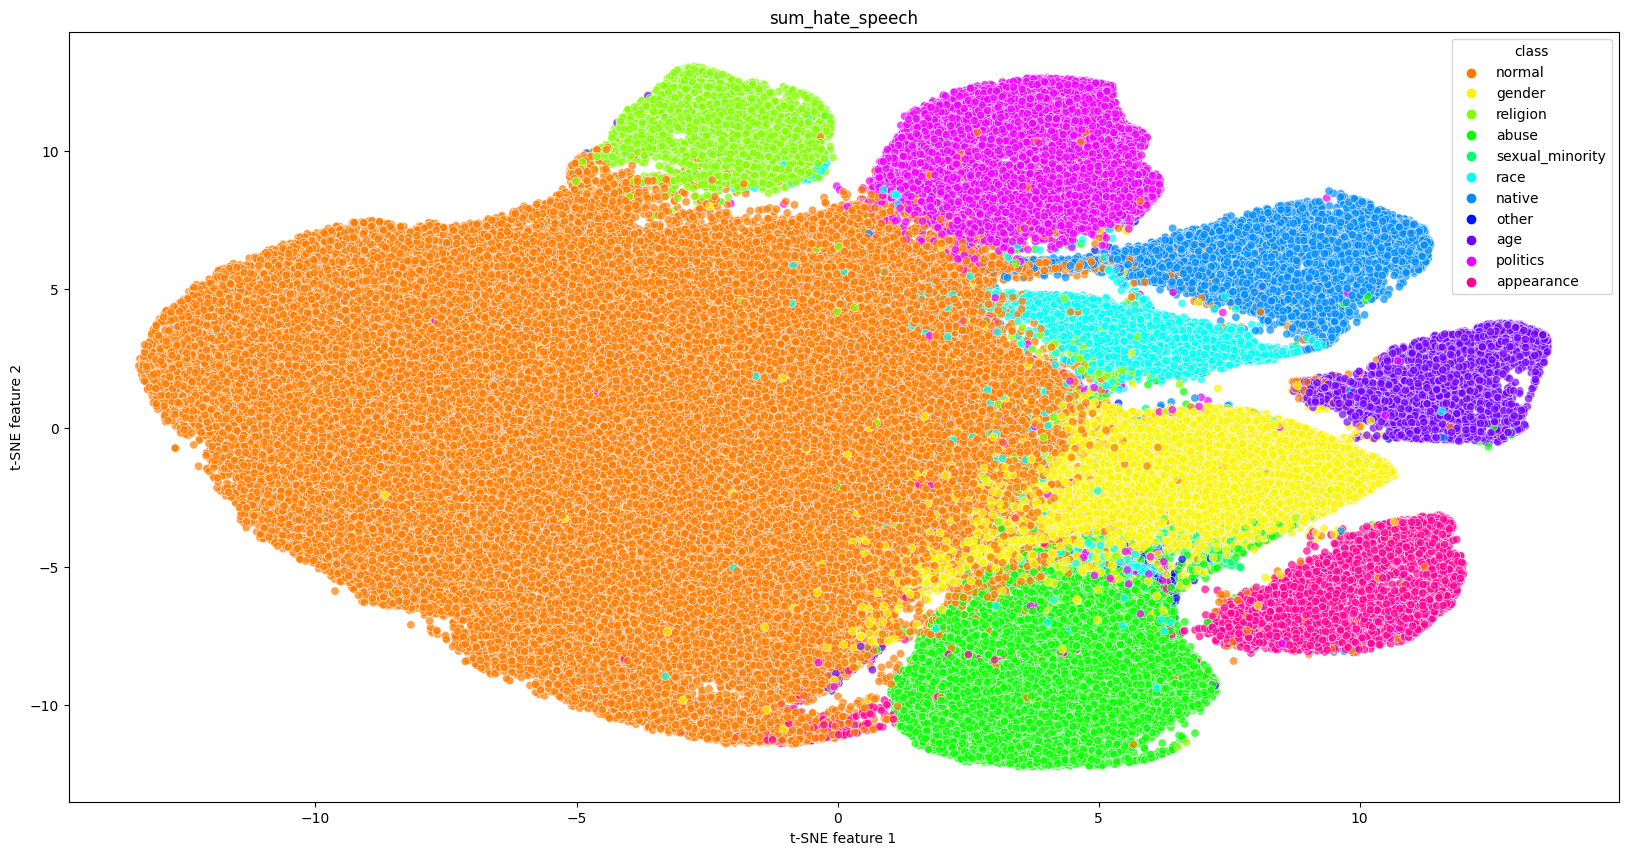

In [21]:
class_list = df['class']

# 일반적 
# 0. 일반발언 common 
# 1. 성차별 sex
# 2. 인종차별 
# 3. 종교차별 religion
# 4. 연령차별 age
# 5. 정치차별 political
# 6. 혐오욕설 
# 7. 출신차별
# 8. 외모차별
# 9. 성소수자 차별
# 10. 기타혐오 other 
visulize_sentences("sum_hate_speech",matrix, class_list)